# **Binary classification of Loan Approval Prediction**

Given with a dataset containing information on loan applicants, including their contact information and the status of their loan application. A binary classification model must be built with the highest level of accuracy.

# **Importing necessary Libraries**

In [ ]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

# **Importing the Dataset**

In [ ]:
input = pd.read_csv("/content/loan_prediction.csv")
input.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
279,LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y
566,LP002836,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
433,LP002387,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban,Y


# **Information of the dataset**

In [ ]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Shape of the Dataset**

In [ ]:
input.shape

(614, 13)

# **Let's examine Categorical columns first:**

In [ ]:
categorical_columns = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


**Visualizing the Categorical values of the Dataset:**

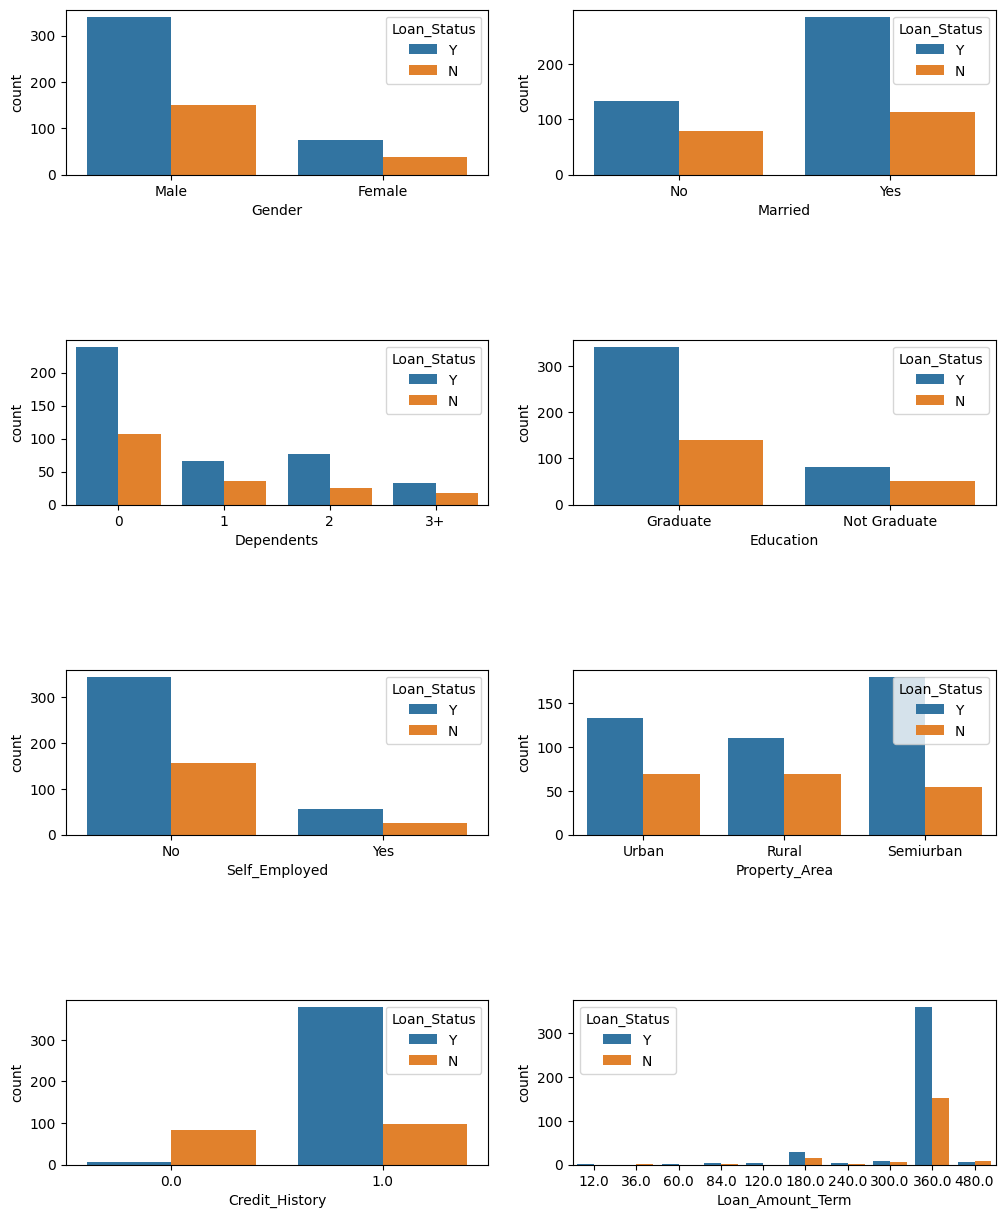

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=input,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

**Loan Approval Status:** Approximately two thirds of applicants received a
loan.

**Sex Ratio:** Men outnumber women by around three times (sex).

**Marital Status:** Married applicants are more likely to be approved for loans because they make up two-thirds of the population in the dataset.

**Dependents:** The vast majority of people have no dependents, making them more likely to be approved for loans.

**Education:** Graduates make up about 5/6 of the population and have a higher chance of getting loans approved.

**Employment:** In terms of employment, just 5/6 of people are independent contractors.

**Property Area:** Semi-urban applicants are more likely to get approved for loans.

**Credit history:** Applications with a credit history have a far higher chance of being approved.

**Loan Quantity Term:** The majority of loans are 360 months long (30 years).


























# **Let's examine numerical columns next:**

In [ ]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


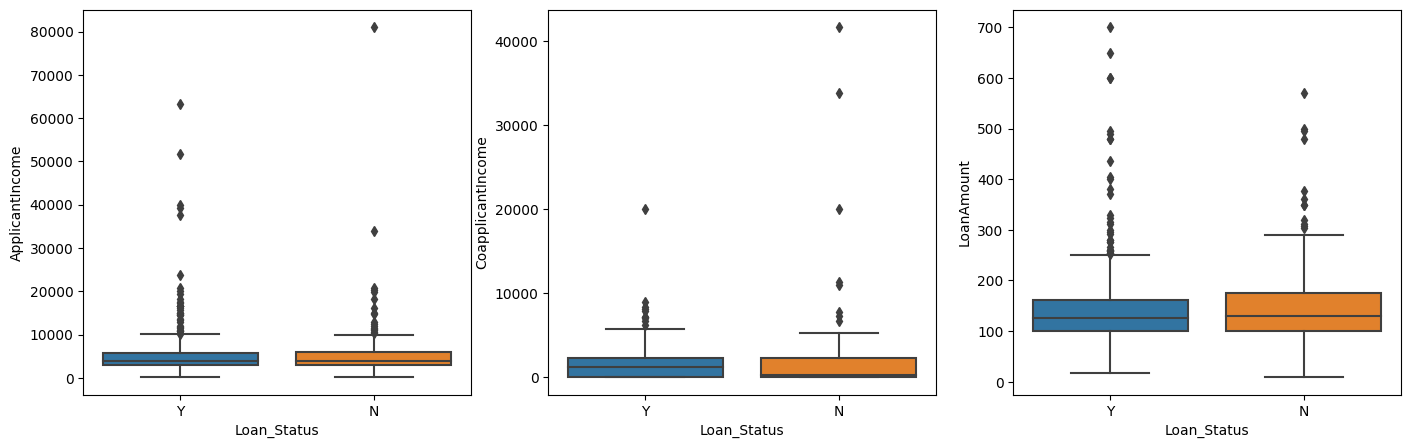

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=input,x='Loan_Status',ax=axes[idx])

print(input[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

**There is no meaningful correlation between Loan Approval Status and Numerical Columns.**


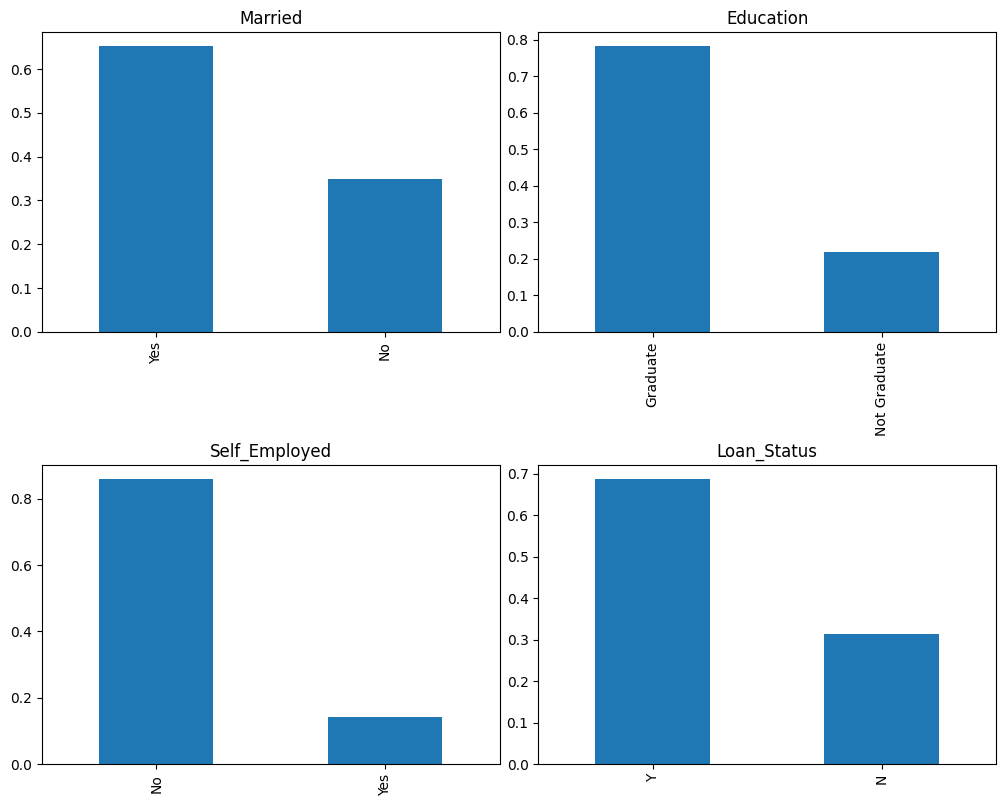

In [ ]:
plt.subplot(221)
input.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married",figsize=(10,8))
plt.tight_layout(pad=0.5)
plt.subplot(222)
input.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)
plt.subplot(223)
input.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)
plt.subplot(224)
input.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)



1.   In the training dataset, men make up 80% of loan applications.
2.   Graduates make up about 75% of loan applicants.
3.   Nearly 85–90% of loan applicants are independent contractors.
4.   More than 65% of applicants have had their loan requests accepted.
5.   Almost 70% of people are Married.









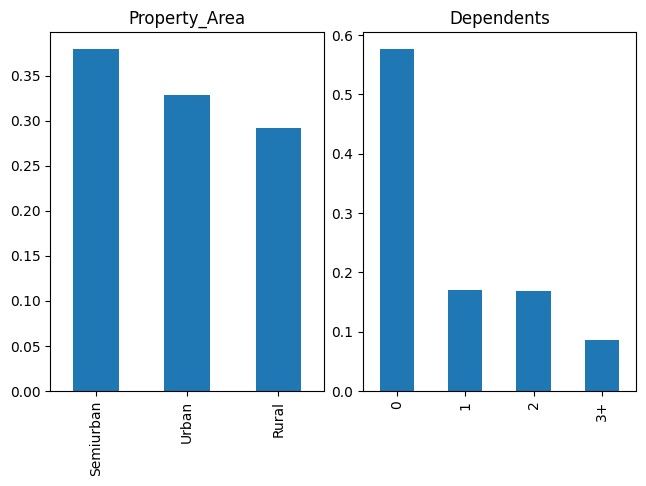

In [ ]:
plt.subplot(121)
input.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)
plt.subplot(122)
input.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)





1.   Nearly 58% of the candidates are single.
2.   Following urban areas in terms of applicant volume are semi-urban locations.



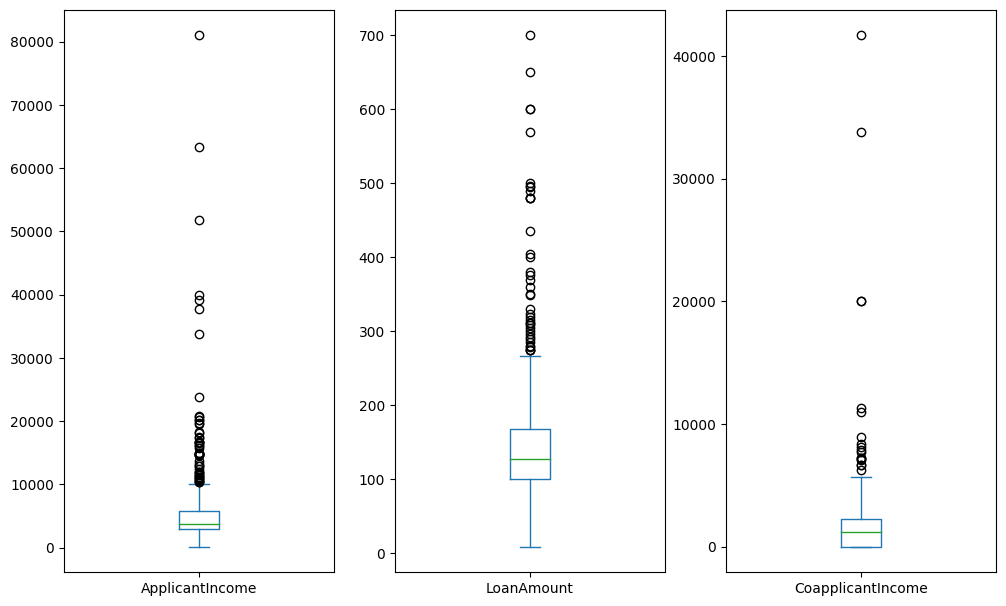

In [ ]:
plt.subplot(131)
input['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
input['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
input['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

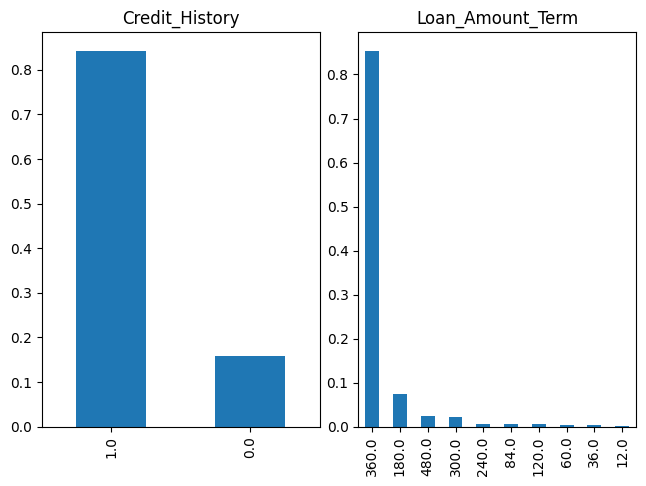

In [ ]:
plt.subplot(121)
input.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)
plt.subplot(122)
input.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

85% of applicants have credit histories that are only one.
The average loan is taken out for 360 days.
The applicant's income ranges from 10,000 to 40,000 with a few outliers.
The coapplicant's income is less than the applicant's income and falls between 5,000 and 15,000, with some outliers once more.
Most of the loan amount is focused between 250 and 500.





**Plots for various categorical variables with respect to the 'Loan_Status' variable**

<Axes: xlabel='Property_Area', ylabel='count'>

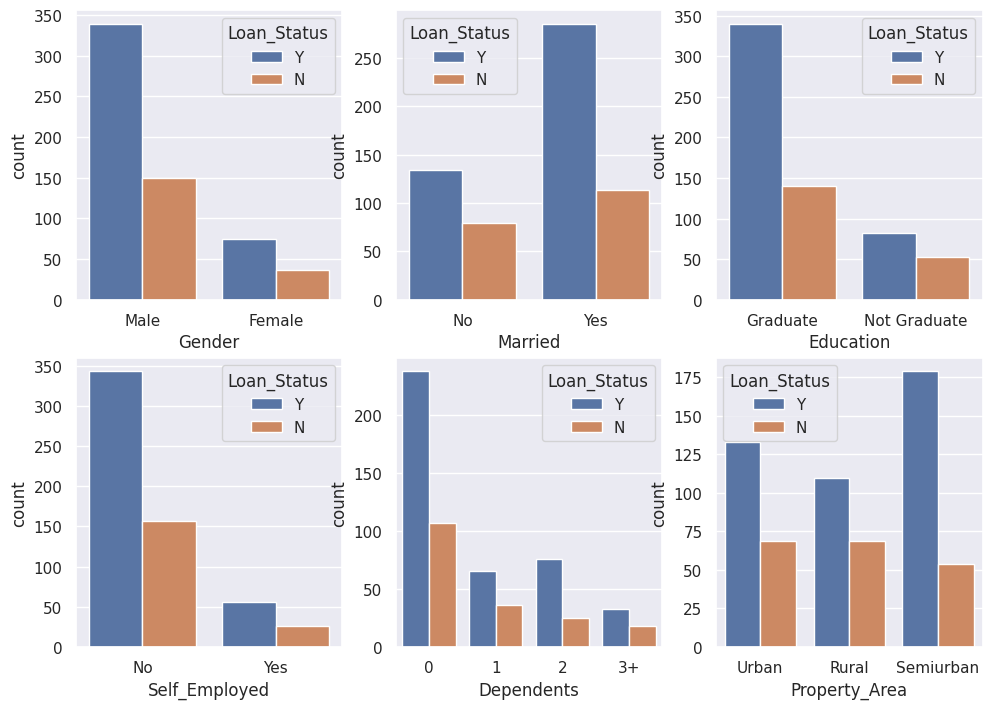

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=input)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=input)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=input)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=input)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=input)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=input)

The difference in approval rates between men and women is not particularly significant.
The likelihood of loan acceptance is somewhat higher for married borrowers.
Graduates have a better probability of getting a loan approved than non-graduates do.
The loan approval rates for self-employed versus non-self-employed borrowers do not significantly differ.
The likelihood of approval is higher for applicants without dependents or with two dependents. However, this does not really correlate.
Loan acceptance rates for applicants with homes in semi-urban locations are higher.


**A grid of histograms showing the distribution of 'ApplicantIncome' for different genders ('Male' and 'Female') separately.**

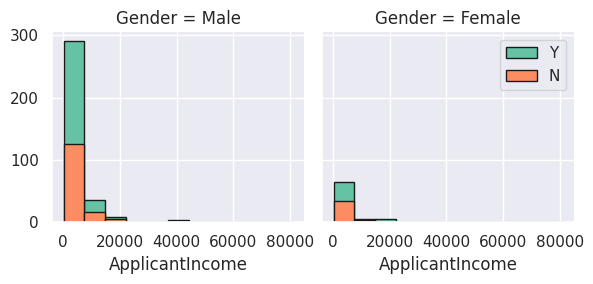

In [ ]:
bins = np.linspace(input.ApplicantIncome.min(), input.ApplicantIncome.max(),12)
graph = sns.FacetGrid(input, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

**histograms for different variables ('LoanAmount' and 'CoapplicantIncome') with respect to the 'Gender' variable.**

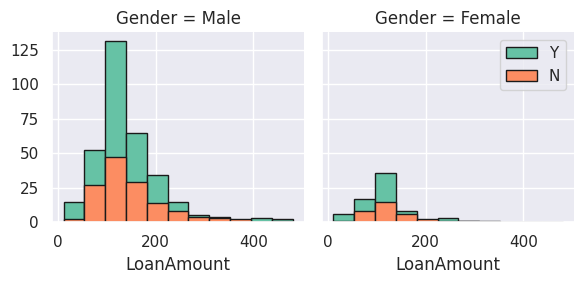

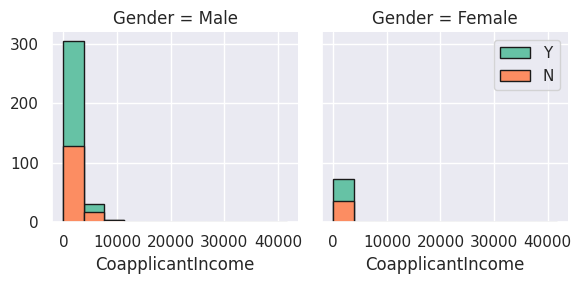

In [ ]:
bins = np.linspace(input.Loan_Amount_Term.min(), input.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(input, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(input.CoapplicantIncome.min(), input.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(input, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

Women with incomes over 7,000 have a better probability of getting loans approved.
Compared to men, women appear to borrow less money.
In comparison to male candidates, female candidates had lower coapplicant income. But it doesn't really affect the loan_status much.


# **Correlation matrix for the DataFrame- Input**

In [ ]:
correlation_mat = input.corr()

<Axes: >

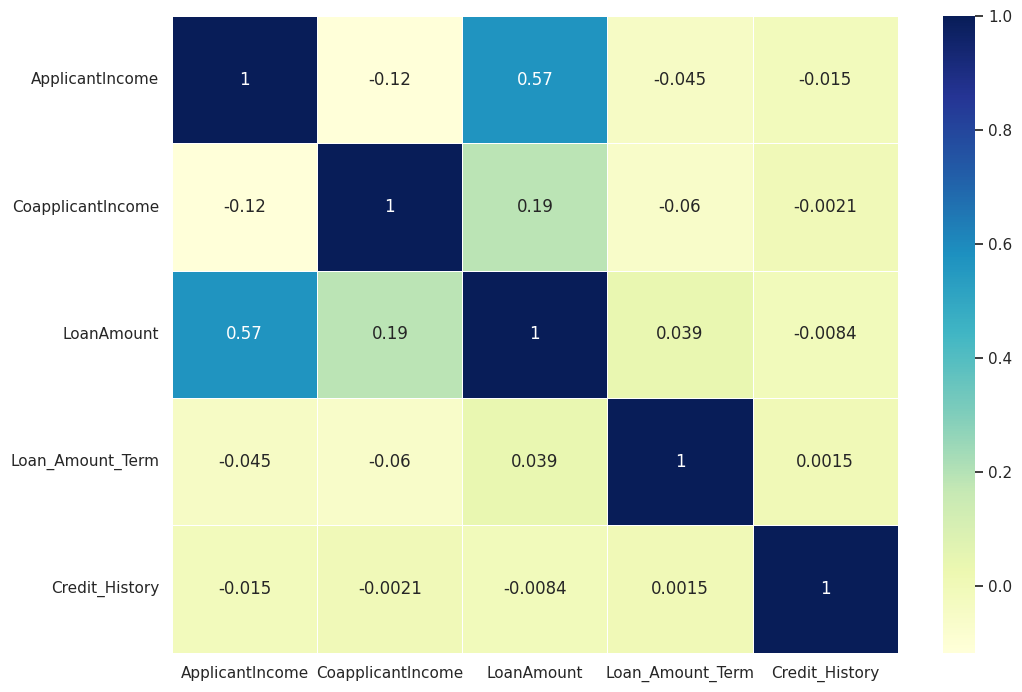

In [ ]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

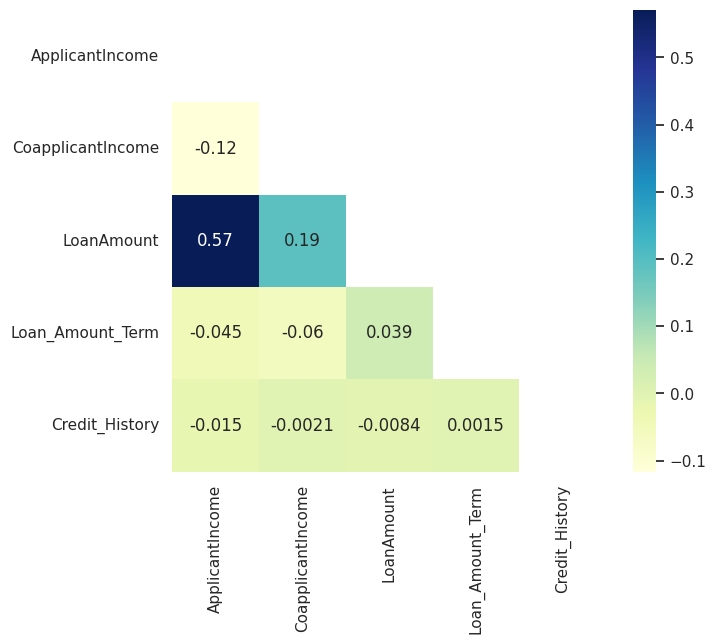

In [ ]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

**The pair plot will contain scatter plots for each combination of numeric variables, showing how they are related to each other. The diagonal plots represent the distributions of individual variables. The plots below the diagonal are mirrored with respect to those above the diagonal, as they represent the same relationships but with the axes swapped.**

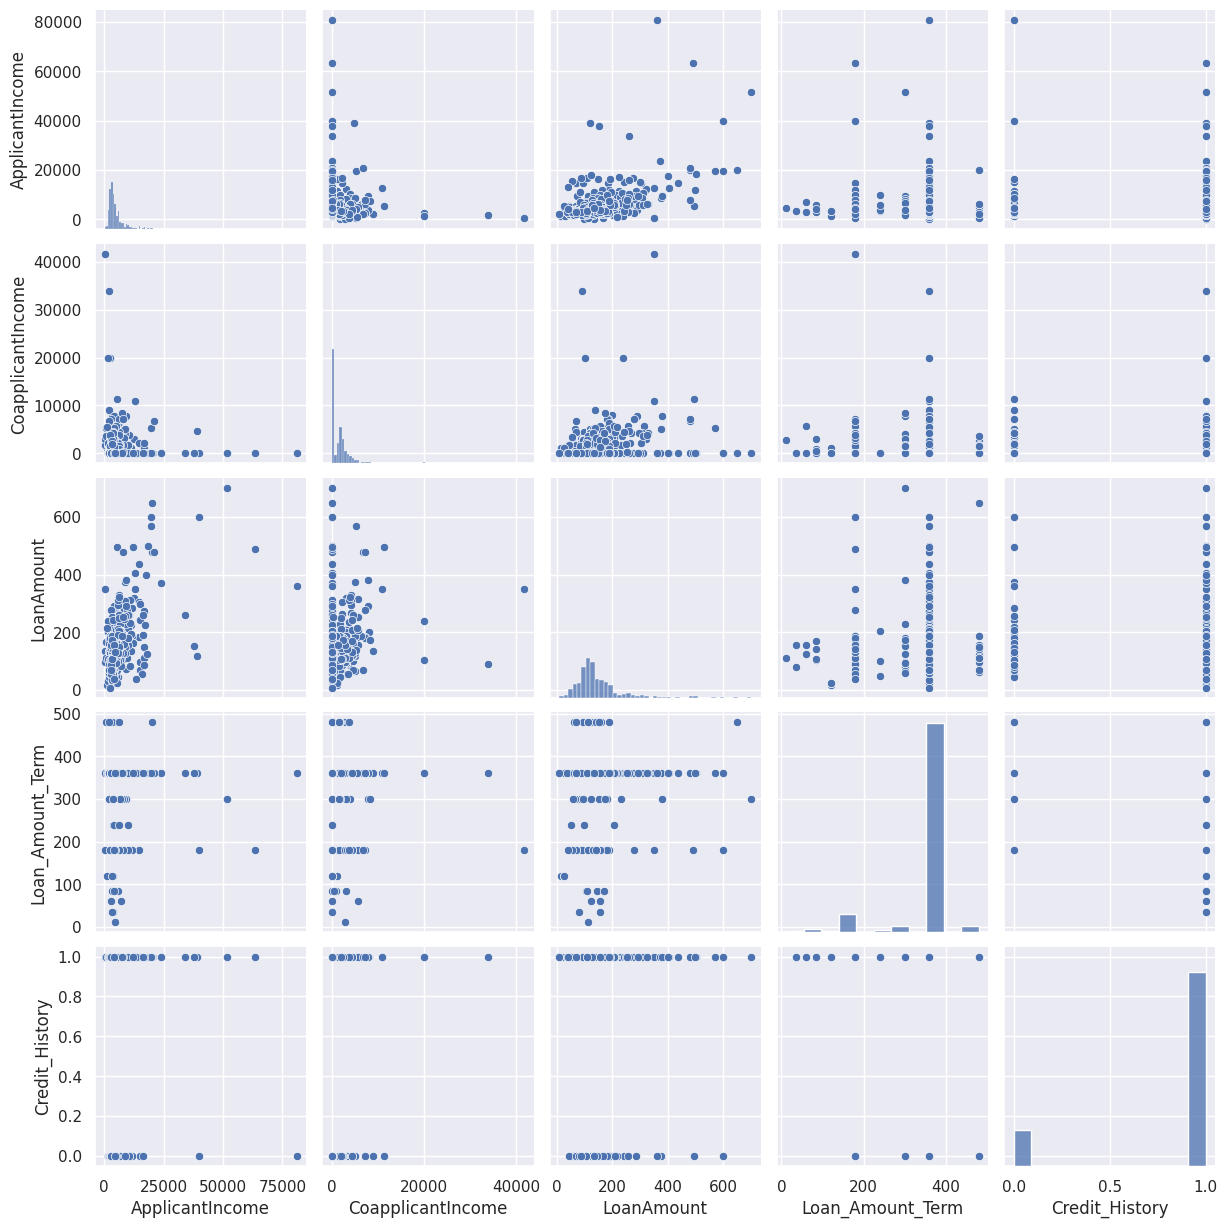

In [ ]:
sns.pairplot(input)
plt.show()

In [ ]:
input.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
